In [188]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix
import sys
sys.path.insert(0,'/Users/yann/repos/hackcancer/intelcancer/src/models')
from rf import random_forest
import matplotlib.pyplot as plt
from matplotlib import cm
import random
import seaborn as sns
sns.set_style('white')

%matplotlib inline

In [189]:
mutations_raw = pd.read_csv('../data/raw/CosmicMutantExportCensus.tsv', delimiter="\t")
resistance_raw = pd.read_csv('../data/raw/CosmicResistanceMutations.tsv', delimiter="\t")

/usr/local/Cellar/ipython/6.4.0/libexec/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [190]:
mutations_raw

,Gene name,Accession Number,Gene CDS length,HGNC ID,Sample name,ID_sample,ID_tumour,Primary site,Site subtype 1,Site subtype 2,...,Resistance Mutation,FATHMM prediction,FATHMM score,Mutation somatic status,Pubmed_PMID,ID_STUDY,Sample Type,Tumour origin,Age,Tier
0,JAK2,ENST00000381652,3399,6192,990000,990000,905319,haematopoietic_and_lymphoid_tissue,NS,NS,...,-,PATHOGENIC,0.94485,Reported in another cancer sample as somatic,16868251.0,NaN,blood-bone marrow,NS,NaN,1
1,BRAF,ENST00000288602,2301,1097,E22133,683800,611960,biliary_tract,bile_duct,NS,...,-,PATHOGENIC,0.98959,Confirmed somatic variant,12692057.0,NaN,surgery-fixed,primary,NaN,1
2,BRAF,ENST00000288602,2301,1097,E21904,686500,614660,thyroid,NS,NS,...,-,PATHOGENIC,0.98542,Reported in another cancer sample as somatic,12697856.0,NaN,surgery - NOS,primary,NaN,1
3,TP53,ENST00000269305,1182,11998,NCI-H1184,688000,616160,lung,NS,NS,...,-,PATHOGENIC,0.99315,Confirmed somatic variant,NaN,678.0,cell-line,metastasis,42.00,1
4,KRAS,ENST00000311936,567,6407,S30505,709800,635643,pancreas,NS,NS,...,-,PATHOGENIC,0.97875,Reported in another cancer sample as somatic,11088049.0,NaN,surgery-fixed,primary,NaN,1
5,KRAS,ENST00000311936,567,6407,S33693,713000,638680,lung,NS,NS,...,-,PATHOGENIC,0.97875,Reported in another cancer sample as somatic,10675482.0,NaN,surgery fresh/frozen,primary,NaN,1
6,NRAS,ENST00000369535,570,7989,bar-11,717900,618867,haematopoietic_and_lymphoid_tissue,NS,NS,...,-,PATHOGENIC,0.91067,Reported in another cancer sample as somatic,2564452.0,NaN,surgery fresh/frozen,secondary,13.00,1
7,KRAS,ENST00000311936,567,6407,S45947,725800,650043,lung,NS,NS,...,-,PATHOGENIC,0.97875,Reported in another cancer sample as somatic,9028355.0,NaN,surgery-fixed,primary,NaN,1
8,KRAS,ENST00000311936,567,6407,S47633,727600,651785,large_intestine,NS,NS,...,-,PATHOGENIC,0.99261,Reported in another cancer sample as somatic,12438234.0,NaN,surgery fresh/frozen,primary,NaN,1
9,KRAS,ENST00000311936,567,6407,S50246,730400,654486,large_intestine,NS,NS,...,-,PATHOGENIC,0.97875,Reported in another cancer sample as somatic,8012953.0,NaN,surgery-fixed,primary,NaN,1


In [191]:
cancers = ['haematopoietic_and_lymphoid_tissue', 'soft_tissue', 'lung']
cancer = cancers[0]

# cancer = 'soft_tissue'

In [192]:
mutations = mutations_raw.loc[mutations_raw['Primary site'] == cancer]
resistance = resistance_raw.loc[resistance_raw['Primary Tissue'] == cancer]

In [193]:
mutations.drop('Gene name', axis=1, inplace=True)
mutations.drop('Accession Number', axis=1, inplace=True)
mutations.drop('Gene CDS length', axis=1, inplace=True)
mutations.drop('HGNC ID', axis=1, inplace=True)
mutations.drop('Sample name', axis=1, inplace=True)
mutations.drop('ID_tumour', axis=1, inplace=True)
mutations.drop('Primary site', axis=1, inplace=True)
mutations.drop('Site subtype 1', axis=1, inplace=True)
mutations.drop('Site subtype 2', axis=1, inplace=True)
mutations.drop('Site subtype 3', axis=1, inplace=True)
mutations.drop('Primary histology', axis=1, inplace=True)
mutations.drop('Histology subtype 1', axis=1, inplace=True)
mutations.drop('Histology subtype 2', axis=1, inplace=True)
mutations.drop('Histology subtype 3', axis=1, inplace=True)
mutations.drop('Genome-wide screen', axis=1, inplace=True)
mutations.drop('Mutation CDS', axis=1, inplace=True)
mutations.drop('Mutation AA', axis=1, inplace=True)
mutations.drop('Mutation Description', axis=1, inplace=True)
mutations.drop('Mutation zygosity', axis=1, inplace=True)
mutations.drop('LOH', axis=1, inplace=True)
mutations.drop('GRCh', axis=1, inplace=True)
mutations.drop('Mutation genome position', axis=1, inplace=True)
mutations.drop('Mutation strand', axis=1, inplace=True)
mutations.drop('SNP', axis=1, inplace=True)
# mutations.drop('Resistance Mutation', axis=1, inplace=True)
mutations.drop('FATHMM score', axis=1, inplace=True)
mutations.drop('Mutation somatic status', axis=1, inplace=True)
mutations.drop('Pubmed_PMID', axis=1, inplace=True)
mutations.drop('ID_STUDY', axis=1, inplace=True)
mutations.drop('Sample Type', axis=1, inplace=True)
mutations.drop('Tumour origin', axis=1, inplace=True)
mutations.drop('Tier', axis=1, inplace=True)

/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [194]:
resistance.drop('Sample Name', axis=1, inplace=True)
resistance.drop('Gene Name', axis=1, inplace=True)
resistance.drop('Transcript', axis=1, inplace=True)
resistance.drop('Census Gene', axis=1, inplace=True)
resistance.drop('AA Mutation', axis=1, inplace=True)
resistance.drop('CDS Mutation', axis=1, inplace=True)
resistance.drop('Primary Tissue', axis=1, inplace=True)
resistance.drop('Tissue Subtype 1', axis=1, inplace=True)
resistance.drop('Tissue Subtype 2', axis=1, inplace=True)
resistance.drop('Histology', axis=1, inplace=True)
resistance.drop('Histology Subtype 1', axis=1, inplace=True)
resistance.drop('Histology Subtype 2', axis=1, inplace=True)
resistance.drop('Pubmed Id', axis=1, inplace=True)
resistance.drop('CGP Study', axis=1, inplace=True)
resistance.drop('Somatic Status', axis=1, inplace=True)
resistance.drop('Sample Type', axis=1, inplace=True)
resistance.drop('Zygosity', axis=1, inplace=True)
resistance.drop('Genome Coordinates (GRCh38)', axis=1, inplace=True)
resistance.drop('Tier', axis=1, inplace=True)

/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [195]:
main_df = pd.merge(mutations, resistance, how='left', left_on=['ID_sample', 'Mutation ID'], right_on=['Sample ID', 'ID Mutation'])
drug_mapping_df = main_df.copy()
main_df.drop(['ID Mutation', 'Sample ID'], axis=1, inplace=True)
main_df.head()

,ID_sample,Mutation ID,Resistance Mutation,FATHMM prediction,Age,Drug Name
0,990000,COSM12600,-,PATHOGENIC,NaN,NaN
1,717900,COSM564,-,PATHOGENIC,13.0,NaN
2,821900,COSM1314,-,PATHOGENIC,23.0,NaN
3,925900,COSM12524,-,NaN,NaN,NaN
4,987400,COSM18466,-,NaN,38.0,NaN


Todos los Yes tienen droga asignada

In [196]:
mutations['Resistance Mutation'].replace(to_replace=['-'], value=0, inplace=True)
mutations['Resistance Mutation'].replace(to_replace=['Yes'], value=1, inplace=True)
mutations.head()

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,ID_sample,Mutation ID,Resistance Mutation,FATHMM prediction,Age
0,990000,COSM12600,0,PATHOGENIC,NaN
6,717900,COSM564,0,PATHOGENIC,13.0
16,821900,COSM1314,0,PATHOGENIC,23.0
23,925900,COSM12524,0,NaN,NaN
26,987400,COSM18466,0,NaN,38.0


In [197]:
tmp_df = mutations.groupby(['Mutation ID']).size().reset_index(name="count").sort_values(by="count", ascending = False)
tmp2_df = tmp_df.loc[tmp_df['count'] > 1]
mutations = pd.merge(mutations, tmp2_df, on="Mutation ID", how="left")

In [198]:
mutations.shape

(145792, 6)

In [199]:
print(mutations.loc[(mutations['Resistance Mutation'] == 1) & (mutations['count'].isnull())].shape)
print(mutations.loc[mutations['count'].isnull()].shape)

(67, 6)
(19448, 6)


## de 25k features, lo reducimos a 5k

In [200]:
mutations = mutations.loc[mutations['count'] > 1]

In [201]:
mutations.shape

(126344, 6)

In [202]:
mutations.head(n = 20)

,ID_sample,Mutation ID,Resistance Mutation,FATHMM prediction,Age,count
0,990000,COSM12600,0,PATHOGENIC,NaN,41442.0
1,717900,COSM564,0,PATHOGENIC,13.0,613.0
2,821900,COSM1314,0,PATHOGENIC,23.0,882.0
3,925900,COSM12524,0,NaN,NaN,153.0
4,987400,COSM18466,0,NaN,38.0,28.0
5,996600,COSM852,0,NaN,41.0,12070.0
6,683465,COSM460,0,PATHOGENIC,NaN,12.0
7,688523,COSM573,0,PATHOGENIC,38.0,322.0
8,688526,COSM573,0,PATHOGENIC,35.0,322.0
9,688530,COSM585,0,PATHOGENIC,24.0,53.0


In [203]:
dummies = pd.get_dummies(mutations['Mutation ID'], dummy_na=True)

In [204]:
result = pd.concat([mutations, dummies], axis=1)

In [205]:
result.drop('Mutation ID', axis=1, inplace=True)
result.head()

,ID_sample,Resistance Mutation,FATHMM prediction,Age,count,COSM100049,COSM100051,COSM100053,COSM100055,COSM100067,...,COSM98206,COSM982226,COSM990721,COSM99134,COSM997,COSM99740,COSM99741,COSM99742,COSM998,nan
0,990000,0,PATHOGENIC,NaN,41442.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,717900,0,PATHOGENIC,13.0,613.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,821900,0,PATHOGENIC,23.0,882.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,925900,0,NaN,NaN,153.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,987400,0,NaN,38.0,28.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [206]:
result[['FATHMM prediction','Age']].info()
result.shape[0]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126344 entries, 0 to 145791
Data columns (total 2 columns):
FATHMM prediction    73233 non-null object
Age                  18473 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.9+ MB


126344

In [207]:
result['FATHMM prediction'] = result['FATHMM prediction'].fillna("Unsure")
result.head(n= 10)

,ID_sample,Resistance Mutation,FATHMM prediction,Age,count,COSM100049,COSM100051,COSM100053,COSM100055,COSM100067,...,COSM98206,COSM982226,COSM990721,COSM99134,COSM997,COSM99740,COSM99741,COSM99742,COSM998,nan
0,990000,0,PATHOGENIC,NaN,41442.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,717900,0,PATHOGENIC,13.0,613.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,821900,0,PATHOGENIC,23.0,882.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,925900,0,Unsure,NaN,153.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,987400,0,Unsure,38.0,28.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,996600,0,Unsure,41.0,12070.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,683465,0,PATHOGENIC,NaN,12.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,688523,0,PATHOGENIC,38.0,322.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,688526,0,PATHOGENIC,35.0,322.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,688530,0,PATHOGENIC,24.0,53.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We assume the missing age as the global average, we could improve using predictive models to fill it on a future iteration.

In [208]:
result['Age'] = result['Age'].fillna(round(result['Age'].mean(), 0))

In [209]:
result.head(n= 10)

,ID_sample,Resistance Mutation,FATHMM prediction,Age,count,COSM100049,COSM100051,COSM100053,COSM100055,COSM100067,...,COSM98206,COSM982226,COSM990721,COSM99134,COSM997,COSM99740,COSM99741,COSM99742,COSM998,nan
0,990000,0,PATHOGENIC,51.0,41442.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,717900,0,PATHOGENIC,13.0,613.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,821900,0,PATHOGENIC,23.0,882.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,925900,0,Unsure,51.0,153.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,987400,0,Unsure,38.0,28.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,996600,0,Unsure,41.0,12070.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,683465,0,PATHOGENIC,51.0,12.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,688523,0,PATHOGENIC,38.0,322.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,688526,0,PATHOGENIC,35.0,322.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,688530,0,PATHOGENIC,24.0,53.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [210]:
result.shape
del result['ID_sample']

In [211]:
result['FATHMM prediction'].replace(to_replace=['PATHOGENIC'], value=2, inplace=True)
result['FATHMM prediction'].replace(to_replace=['Unsure'], value=1, inplace=True)
result['FATHMM prediction'].replace(to_replace=['NEUTRAL'], value=0, inplace=True)

In [212]:
result.head()

,Resistance Mutation,FATHMM prediction,Age,count,COSM100049,COSM100051,COSM100053,COSM100055,COSM100067,COSM100070,...,COSM98206,COSM982226,COSM990721,COSM99134,COSM997,COSM99740,COSM99741,COSM99742,COSM998,nan
0,0,2,51.0,41442.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,13.0,613.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,23.0,882.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,51.0,153.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,38.0,28.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [213]:
del result['count']
X = result.copy()
del X['Resistance Mutation']
y = result['Resistance Mutation']

In [214]:
models = []

In [215]:
# X.drop(['COSM12614','COSM12612','COSM12617','COSM12618','COSM12615','COSM12607','COSM12621','COSM12620','COSM49067','COSM12619','Age'], axis=1, inplace=True)
# X = X[['COSM12614','COSM12612','COSM12617','COSM12618','COSM12615','COSM12607','COSM12621','COSM12620','COSM49067','COSM12619','Age']]


def infercals(XX, yy):
    X_train, X_test, y_train, y_test = train_test_split(XX,yy, test_size = 0.2)
    model = random_forest(X_train, y_train, n_est=10)
    y_score = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    models.append([fpr, tpr, roc_auc])
    
    tn,fp,fn,tp = confusion_matrix(y_test, y_score).ravel()
    print("AUC :",roc_auc)
    print("False Negative: ", fn)
    print("False Negative Rate: ", fn/(fn+tp))
    print("False Positive: ", fp)
    print("False Positive Rate: ", fp/(tn+fp))
    print("True Negative: ", tn)
    print("True Negative Rate: ", tn/(tn+fp))
    print("True Positive: ", tp)
    print("True Positive Rate: ", tp/(fn+tp))


In [220]:
infercals(X,y)

/usr/local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


AUC : 0.8802922753354823
False Negative:  65
False Negative Rate:  0.23809523809523808
False Positive:  33
False Positive Rate:  0.0013202112337974076
True Negative:  24963
True Negative Rate:  0.9986797887662026
True Positive:  208
True Positive Rate:  0.7619047619047619


In [221]:
models

[[array([0.        , 0.00132011, 1.        ]),
  array([0.        , 0.73800738, 1.        ]),
  0.868343637232676],
 [array([0.00000000e+00, 7.20288115e-04, 1.00000000e+00]),
  array([0.        , 0.40143369, 1.        ]),
  0.7003567018205131],
 [array([0.        , 0.00132021, 1.        ]),
  array([0.        , 0.76190476, 1.        ]),
  0.8802922753354823]]

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [170]:
X_train.head(n= 10)
# y_train.head(n = 10)

,FATHMM prediction,Age,COSM100049,COSM100051,COSM100053,COSM100055,COSM100067,COSM100070,COSM1000721,COSM1000723,...,COSM98206,COSM982226,COSM990721,COSM99134,COSM997,COSM99740,COSM99741,COSM99742,COSM998,nan
26060,1,51.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50824,2,51.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31642,2,51.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18878,1,51.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56226,1,51.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30779,2,51.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123012,2,51.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68111,2,29.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55952,2,51.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
126001,1,51.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
model = random_forest(X_train, y_train, n_est=10)

/usr/local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [172]:
probs = model.predict_proba(X_test)

In [173]:
y_score = model.predict(X_test)

In [174]:
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

In [175]:
tn,fp,fn,tp = confusion_matrix(y_test, y_score).ravel()
print("AUC :",roc_auc)
#print("False Positive Rate: ", fpr)
print("False Negative: ", fn)
print("False Negative Rate: ", fn/(fn+tp))
print("False Positive: ", fp)
print("False Positive Rate: ", fp/(tn+fp))
print("True Negative: ", tn)
print("True Negative Rate: ", tn/(tn+fp))
print("True Positive: ", tp)
print("True Positive Rate: ", tp/(fn+tp))

AUC : 0.7802694107044541
False Negative:  114
False Negative Rate:  0.43846153846153846
False Positive:  25
False Positive Rate:  0.0009996401295533609
True Negative:  24984
True Negative Rate:  0.9990003598704467
True Positive:  146
True Positive Rate:  0.5615384615384615


In [176]:
# model_2 = random_forest(X, y, n_est=10, folds=3)

In [177]:
#importances = model.feature_importances_

#ss = [[feat, importance]for feat, importance in zip(X.columns, importances)]
#d.sort(key=lambda x: x[1], reverse=True)

In [178]:
# x = [{i:random.randint(1,5)} for i in range(30)]
gene_positions = {}    # map number of positions per gene
mut_ids = {}
selection = ['haematopoietic_and_lymphoid_tissue', 'soft_tissue', 'lung']
header = True
d = {}
with open('/Users/yann/repos/hackcancer/intelcancer/data/raw/CosmicMutantExportCensus.tsv', 'r') as fi:
    for line in fi:
        if header:
            header = False
        else:
            line = line.strip().split('\t')
            gene = line[0] 
            mutid = line[16]
            posi  = line[17]
            d[mutid]=gene+posi[1:]


In [179]:
limit = 20
importances = model.feature_importances_
features = [d[i] if i in d else i for i in X.columns]
ss = [[feat, impor] for feat, impor in zip(features, importances)]
ss.sort(key=lambda x: x[1], reverse=True)
x, y = [i[0] for i in ss][:limit], [i[1] for i in ss][:limit]
#indices = np.argsort(importances)[:20]

#print(importances[indices][::-1])
#print(features[indices][::-1])
#print(indices)

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


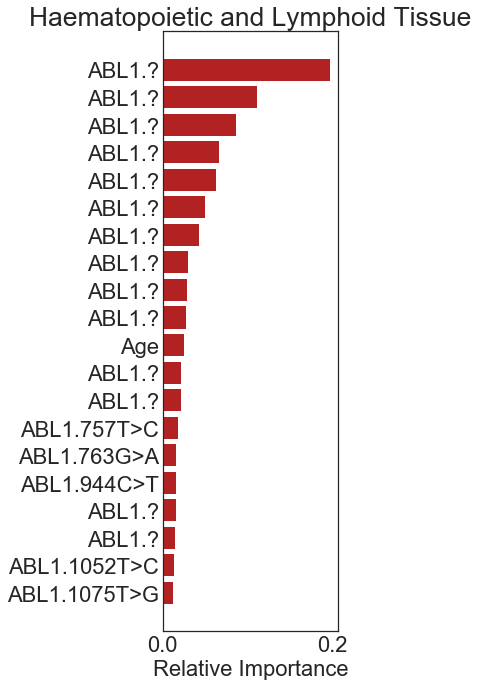

In [180]:
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
plt.figure(figsize=(6,10))
plt.title('Haematopoietic and Lymphoid Tissue')
plt.barh(range(limit), y[::-1], color='firebrick', align='center')
plt.yticks(range(limit), x[::-1])
plt.xlabel('Relative Importance')
plt.show()

In [181]:
plt.figure(figsize=(15,6))
plt.scatter(X.Age, y.values)
plt.xlabel('Age')
plt.ylabel('resistance')
plt.show()

AttributeError: 'list' object has no attribute 'values'

<Figure size 1080x432 with 0 Axes>

In [ ]:
X.loc[(X['Age'] > 50) & (X['Age'] < 60)].shape[0]*100 /X.shape[0]

In [ ]:
color = cm.inferno_r(np.linspace(.4,.8, 30))